# 5章 GLMの尤度比検定と検定の非対称性 

## まえがき

* データ解析というと「検定」、それだけで十分と信じている人もいる。
* 検定とはそんなに偉い手法なのか？
* 解析結果は「有意でした」と言えばそれで良いのか？

* この本は、統計モデリング試行錯誤主義とでもいうべき、統計モデルによる推測・予測を重視する方向性
* AICによるモデル選択と同様に、検定は推定された統計モデルを比較する方法の一つ。
* どのような統計モデルでも利用可能な「尤度比検定」を扱う。

Q. 尤度比検定とは

A.
* 逸脱度の差に注目する考え方
* どのような統計モデルであっても、ネストしているモデルたちを比較できる

---

* 尤度比検定に限らず、パラメータを最尤推定できる統計モデルの検定を総称して、「統計モデルの検定」と呼ぶ場合もある
* 全パラメーターを最尤推定できる統計モデルは「パラメトリックな統計モデル」と総称できる。

## 5.1. 統計学的な検定のわくぐみ

* 最大対数尤度に注目して複数のモデルを比較するという点において、統計モデルの検定はモデル選択と表面的には類似。

### モデル選択の流れ

No.| 統計モデルの検定(Neyman-Pearsonの検定の枠組み) | AICによるモデル選択 |
:--: | :-----------: | :------------: |
1| 使用するデータの確定（最後までそのデータだけ、常に全て使う）  |同左| 
2| 目的とデータの構造に対応した適切な統計モデルを設計  |同左| 
3| パラメーターを最尤推定する |同左|
| 帰無仮説・対立仮説 | ネストしているモデル（パラメータの少ないモデルと多いモデル）| 
4| 「帰無仮説は正しい」という命題が否定できるかどうかだけを調べる。モデルの当てはまりの良さを検定統計量に指定。帰無仮説が「真のモデル」であると仮定し、検定統計量の確率分布を調べ、「ありがちな範囲」を定める。  | モデル選択基準AICでそれぞれのモデルを評価 |
5| 対立仮説のモデルで得られた検定統計量が、この「ありがちな範囲」からはみ出ているかどうかを確認、もしはみ出ていれば、帰無仮説は棄却され、対立仮説が支持されたと結論。 | 予測の良いモデル（AICの低いモデル）を選ぶ |


## 5.2. 尤度比検定の例題：逸脱度の差を調べる

* 種子数データ
* 使用する統計モデルは$\lambda = \exp(\beta_1 + \beta_2 x_i)$を平均とするポアソン分布のGLM
* 一定モデルとxモデルのうち、帰無仮説となる一定モデルが棄却できるかを調べる。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/Users/takizawa/dev/python/books/midori/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("data3a.csv")

In [3]:
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [4]:
model_1 = smf.glm('y~1',data=data,family=sm.families.Poisson())
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Thu, 06 Jul 2017   Deviance:                       89.507
Time:                        00:55:26   Pearson chi2:                     87.1
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [5]:
model_2 = smf.glm('y~x',data=data,family=sm.families.Poisson())
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 06 Jul 2017   Deviance:                       84.993
Time:                        00:55:26   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

### 尤度比

* この例題の場合だと、一定モデルの最大尤度 / xモデルの最大尤度

In [6]:
np.exp(result_1.llf) / np.exp(result_2.llf)

0.10466708976326916

### 逸脱度の差

* 尤度比検定では、尤度比の対数を取り$-2$をかける。つまり逸脱度の差
$$
\Delta D_{1,2} = -2 \times (\log L_{1}^* - \log L_{2}^*)
$$
に変換して、検定統計量として使う。
* (復習)逸脱度は、
$$
D = -2 \log L^*
$$
* 同じデータに対してパラメータ数の多いモデルの方が常に小さくなる。

In [7]:
result_1.deviance - result_2.deviance

4.513941078851829

* 上記だと、一定モデルにくらべてxモデルでは当てはまりの悪さである逸脱度が4.5下がった（改善された）ということ。
* では、検定統計量であるこの逸脱度の差が「4.5ぐらいでは改善されていない」と行って良いのかどうか調べる。

## 5.3. 2種類の過誤と統計学的な検定の非対称性

* Neyman-Pearsonの検定の枠組みでは、比較するモデルを帰無仮説(本例では一定モデル）と対立仮説（本例ではxモデル）に分類する。
* この概念を導入すると、一見、「帰無仮説が正しくなければ対立仮説は正しい」あるいは「対立仮説が正しくなければ帰無仮説が正しい」が成立しているかのような気がするが、そうではない。

| 帰無仮説は真のモデルか | $\Delta D_{1,2}$は滅多にない差(帰無仮説を棄却) | $\Delta D_{1,2}$はよくある差(棄却できない) |
|:-----------:|:------------:|:------------:|
| 真のモデルである | 第1種の過誤 | 問題なし |
| 真のモデルでない | 問題なし | 第2種の過誤 |

Q. 第1種の過誤とは？

A.
* 帰無仮説が真のモデルで、帰無仮説を棄却すること
* データが帰無仮説（一定モデル）から生成されたのに、「逸脱度の差$\Delta D_{1,2}$が大きいから、対立仮説（xモデル）の方が良い、帰無仮説は正しくない」と判断すること。

---

Q. 第2種の過誤とは？

A.
* 対立仮説が真のモデルで、帰無仮説を棄却しないこと
* データが対立仮説（xモデル）から生成されたのに、「逸脱度の差$\Delta D_{1,2}$が小さいから対立仮説は意味もなく複雑、一定モデルで観察されたパターンを説明できるから、帰無仮説（一定モデル）は正しい」と判断すること。

---

* この2種類の過誤をどちらも回避するのは困難。
* そこで第1種の過誤の検討にだけ専念するのがNeyman-Pearsonの検定の枠組みの要点

### 第1種の過誤の回避に専念する場合の全体の流れ

1. まずは帰無仮説（一定モデル）が正しいものだと過程
2. 観測データに帰無仮説（一定モデル）を当てはめ、パラメータを取得。これが真のモデルとほぼ同じと考えよう。
3. この真のモデルからデータをなんども生成し、その度に帰無仮説と対立仮説を当てはめ、たくさんの$\Delta D_{1,2}$を得て、分布を見る。
4. 帰無仮説と対立仮説の逸脱度の差$\Delta D_{1,2}$が、観測データで求めた値より大きくなる確率 $P$ が求められる。
5. 何らかの確率計算と判断によって、観測データで求めた逸脱度の差が「ありえない」値だとみなされた場合→帰無仮説は棄却され、残された対立仮説が自動的に採択される。

* 第1種の過誤の重視は「検定の非対称性」と呼ばれる。

## 5.4. 帰無仮説を棄却するための有意水準

* 一定モデルとxモデルの逸脱度の差が $\Delta D_{1,2} \geqq 4.5$となる確率 $P$ は $P$値と呼ばれる。
* この$P$値は第1種の過誤をおかす確率である。

### $P$ 値の利用方法

* $P$値が「大きい」：$\Delta D_{1,2}=4.5$はよくあること→帰無仮説棄却できない
* $P$値が「小さい」：$\Delta D_{1,2}=4.5$は珍しいこと→帰無仮説を棄却しよう。残った対立仮説を正しいことにしよう。

### $P$ 値の大小の判断基準

* Neyman-Pearsonの検定の枠組みでは、有意水準$\alpha$ を事前に決めておいて、下記のように判断する。
     * $P \geqq \alpha $ :帰無仮説は棄却できない
     * $P < \alpha $ :帰無仮説は棄却できる
* $\alpha$は自分で好き勝手に決めるしかない。慣習的には$\alpha = 0.05$がよく用いられる 。    

### 5.4.1. 方法(1) 汎用性のあるパラメトリックブートストラップ法

* 具体的な方法を見ていく。
* result_1には、一定モデルの推定結果、result_2にはxモデルの推定結果が入っている。

#### 一定モデルで推定された平均種子数に基づきデータを生成

In [8]:
result_1.params[0]

2.0579625100027119

In [9]:
np.exp(result_1.params[0])

7.830000000000001

In [10]:
np.random.seed(10)
data["y_rand"] = np.random.poisson(np.exp(result_1.params[0]),100)

In [11]:
data.head()

,y,x,f,y_rand
0,6,8.31,C,6
1,6,9.44,C,5
2,6,9.50,C,11
3,12,9.07,C,10
4,10,10.16,C,6


In [12]:
data.y_rand.mean()

7.4500000000000002

In [13]:
model_1_rand = smf.glm('y_rand~1',data=data,family=sm.families.Poisson())
model_2_rand = smf.glm('y_rand~x',data=data,family=sm.families.Poisson())
result_1_rand = model_1_rand.fit()
result_2_rand = model_2_rand.fit()
result_1_rand.deviance - result_2_rand.deviance

2.7068337885090159

* これにより、「一定モデルが真のモデルである世界」での逸脱度の差が1個得られた

#### 1000回くりかえす

In [14]:
deviance_list = list()
for i in range(1000):
    data["y_rand"] = np.random.poisson(np.exp(result_1.params[0]),100)
    model_1_rand = smf.glm('y_rand~1',data=data,family=sm.families.Poisson())
    model_2_rand = smf.glm('y_rand~x',data=data,family=sm.families.Poisson())
    result_1_rand = model_1_rand.fit()
    result_2_rand = model_2_rand.fit()
    deviance_list.append(result_1_rand.deviance - result_2_rand.deviance)

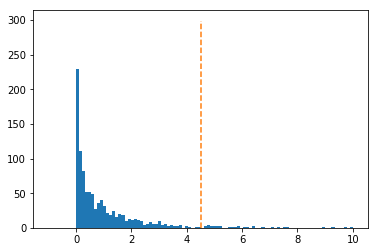

In [15]:
plt.hist(deviance_list,bins=100,range=(-1,10))

plt.plot([4.5]*300,range(0,300),"--")

* これにより、「一定モデルが真のモデルである世界」での逸脱度の差が1000個得られた。

#### $P$値を調べる

In [16]:
array = np.array(deviance_list)

In [17]:
array[array>=4.5].shape

(37,)

* 1000個中、37個が4.5以上となった。
* 「逸脱度の差が4.5より大きくなる確率」$P$  = 0.037

#### $P=0.05$となる逸脱度の差$\Delta D_{1,2}$を調べる

In [18]:
np.percentile(deviance_list,95)

3.5852910885010738

* $\Delta D_{1,2} \leqq 3.58$ ぐらいまではよくある差とみなされる。

#### 尤度比検定の結論

* 逸脱度の差4.5の$P$値は0.037だったので、これは有意水準0.05よりも小さい。
* よって有意差がある。
* 帰無仮説（一定モデル）は棄却され、xモデルが残るのでこれを採択する。

#### 言い換えれば

* 逸脱度の差4.5の起きる確率は、帰無仮説を真のモデルとすると、3.7%。滅多に起きるようなことではない。
* そのため帰無仮説を真のモデルとしたのが間違い。よって棄却。

### 5.4.2. 方法(2) $\chi^2$分布を使った近似計算法

* 方法(1)では乱数シミュレーションを用いて検定統計量の分布を作成した。
* 近似計算法を使うと、お手軽に尤度比検定できる場合がある。

* [Pythonのstatsmodelsのanova関数はGLMに対応してない](http://imaimamu.com/archives/2027)とのこと。
* AttributeError: 'GLM' object has no attribute 'ssr'
* （よくわからないが）ただ、下記で計算できるみたい。

In [19]:
chi = pd.Series(np.random.chisquare(1,1000))

print(chi[chi>=4.5].shape[0] / 1000)
print(chi.quantile(0.95))

0.045
4.052324571500668


* $\chi^2$分布近似はサンプルサイズが大きい場合に有効な近似計算。
* 調査した個体数が多くない小標本の元では、パラメトリックブートストラップ法を使って、逸脱度の差の分布をシミュレーションで生成するのが良い。
* (よくわからない)もしデータのばらつきがポアソン分布ではなく、等分散正規分布の場合には小標本の場合の検定統計量の確率分布を利用でき、そちらの方が$\chi^2$分布近似よりも正確。
* (よくわからない)平均の差を検定統計量とする場合にはt分布、分散比を検定統計量とする場合にはF分布がよく使われている。

## 5.5. 「帰無仮説を棄却できない」は「差がない」ではない

### 仮に$P \geqq \alpha$となった場合は、どのように結論づければ良いか。
* その場合には「帰無仮説は棄却できない」と結論する。
* 「帰無仮説が正しい」という意味ではない。
* 帰無仮説・対立仮説のどちらも正しいとも正しくないとも言えない、判断を保留するということ。
* 「帰無仮説が棄却できないときは帰無仮説が正しい」とする論法は検定の誤用になる。

* Neyman-Pearsonの枠組みの検定には非対称性がある。
* そのため、$P < \alpha$ と　$P \geqq \alpha$とで「結論できること」が随分異なる。
* Neyman-Pearsonの枠組みの中では、第２種の過誤の確率$P_2$ を使って何かを定量的に主張する手続きは用意されていない。
* (よくわからない）第２種の過誤の確率$P_2$について検討するときには、$1-P_2$と定義される検定力がよく使われている。

## 5.6. 検定とモデル選択、そして推定された統計モデルの解釈

* 尤度比検定とAICによるモデル選択はどちらも逸脱度あるいは最大対数尤度に注目しているが目的が異なるため、混同してはいけない。
* AICによるモデル選択は「良い予測をするモデル」を選ぶという目的。「予測の良さとは平均対数尤度」と明示した上で、平均対数尤度を最大対数尤度とパラメーター数から推定。
* 尤度比検定などNeyman-Pearsonの枠組みのもとでの統計学的な検定の目的は、帰無仮説の安全な棄却。

## 5.7. この章のまとめと参考文献

* 統計モデルの検定とAICによるモデル選択を比較した。
* 尤度比検定について扱った。
* Neyman-Pearsonの統計学的検定の枠組みでは、パラメーター数の少ないモデルを帰無仮説と位置づけ、帰無仮説が棄却できるかどうかの確率評価に専念した。
* 尤度比検定の検定統計量は、帰無仮説、対立仮説の逸脱度差。
* 検定における過誤は2種類あるが、Neyman-Pearsonの検定の枠組みでは帰無仮説の誤棄却を重視する（検定の非対称性）
* $\alpha=0.05$に根拠はない
* 帰無仮説が棄却できない場合の結論は何も言えない、つまり判断を保留するしかない。
* (よくわからない）推定やモデル選択の結果だけに注目するだけではなく、推定された統計モデルが対象となる現象の挙動を、どのように予測しているのかも確認するべきだ。
* 統計学的な検定が「とにかく$P < 0.05$さえ出せばいい、そうすれば何を主張しても良い」といった万能ツールではないことを確認するのがこの章の主題。
